<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-data" data-toc-modified-id="Read-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read the data</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Build-a-model-using-one-feature---Size" data-toc-modified-id="Build-a-model-using-one-feature---Size-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build a model using one feature - Size</a></span><ul class="toc-item"><li><span><a href="#define-X-and-y" data-toc-modified-id="define-X-and-y-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>define X and y</a></span></li><li><span><a href="#set-up-the-linear-regression-model" data-toc-modified-id="set-up-the-linear-regression-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>set up the linear regression model</a></span></li><li><span><a href="#make-predictions" data-toc-modified-id="make-predictions-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>make predictions</a></span></li><li><span><a href="#evaluate-the-model" data-toc-modified-id="evaluate-the-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>evaluate the model</a></span></li><li><span><a href="#visualize-the-predictions" data-toc-modified-id="visualize-the-predictions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>visualize the predictions</a></span></li></ul></li><li><span><a href="#Build-a-model-using-multiple-features" data-toc-modified-id="Build-a-model-using-multiple-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build a model using multiple features</a></span><ul class="toc-item"><li><span><a href="#define-X_multi" data-toc-modified-id="define-X_multi-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>define X_multi</a></span></li><li><span><a href="#set-up-2nd-linear-model" data-toc-modified-id="set-up-2nd-linear-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>set up 2nd linear model</a></span></li><li><span><a href="#make-predictions" data-toc-modified-id="make-predictions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>make predictions</a></span></li><li><span><a href="#evaluate-the-model" data-toc-modified-id="evaluate-the-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>evaluate the model</a></span></li></ul></li><li><span><a href="#Test-model-on-new-data" data-toc-modified-id="Test-model-on-new-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Test model on new data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# 线性回归预测房价

**任务:**
基于usa_housing_price.csv数据，建立线性回归模型，预测合理房价：
1. 以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果
2. 以income、house age、numbers of rooms、population、area为输入变量，建立多因子模型，评估模型表现
3. 预测Income=65000, House Age=5, Number of Rooms=5, Population=30000,size=200的合理房价  


## Read the data

In [2]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')

In [4]:
print(data.shape)
data.head()

(5000, 6)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


## Visualize the data

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

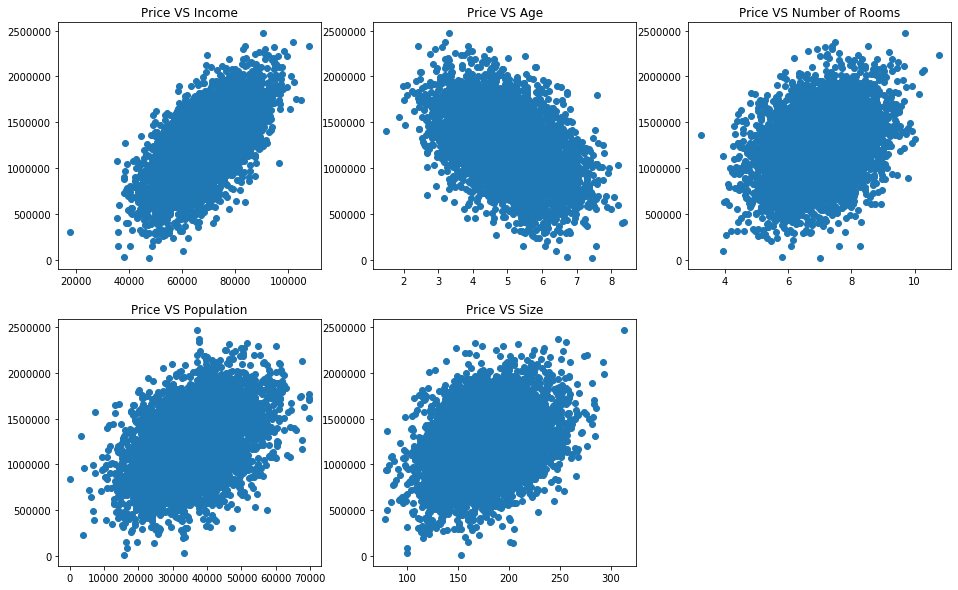

In [15]:
fig = plt.figure(figsize=(16,10))
fig1 = plt.subplot(231)
plt.scatter(data['Avg. Area Income'], data['Price'])
plt.title('Price VS Income')


fig2 = plt.subplot(232)
plt.scatter(data['Avg. Area House Age'], data['Price'])
plt.title('Price VS Age')

fig3 = plt.subplot(233)
plt.scatter(data['Avg. Area Number of Rooms'], data['Price'])
plt.title('Price VS Number of Rooms')

fig3 = plt.subplot(234)
plt.scatter(data['Area Population'], data['Price'])
plt.title('Price VS Population')

fig3 = plt.subplot(235)
plt.scatter(data['size'], data['Price'])
plt.title('Price VS Size')

plt.show()

## Build a model using one feature - Size

### define X and y

In [16]:
X = data[['size']]
y = data[['Price']]
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### set up the linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
#train the model
LR1 = LinearRegression()
LR1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### make predictions

In [18]:
y_predicted_1 = LR1.predict(X)
y_predicted_1

array([[1276881.85636623],
       [1173363.58767144],
       [1420407.32457443],
       ...,
       [1097848.86467426],
       [1264502.88144558],
       [1131278.58816273]])

### evaluate the model

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
MSE_1 = mean_squared_error(y, y_predicted_1)
R2_1 = r2_score(y, y_predicted_1)
MSE_1, R2_1

(108771672553.6264, 0.1275031240418234)

### visualize the predictions

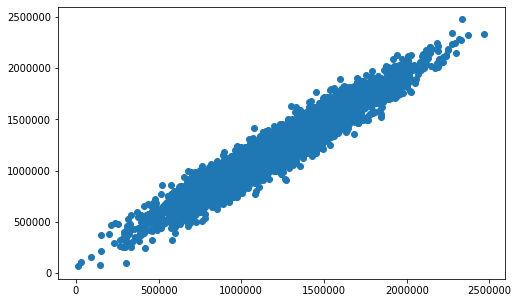

In [35]:
fig = plt.figure(figsize=(8,5))
plt.scatter(y, y_predicted_multi)
plt.show()

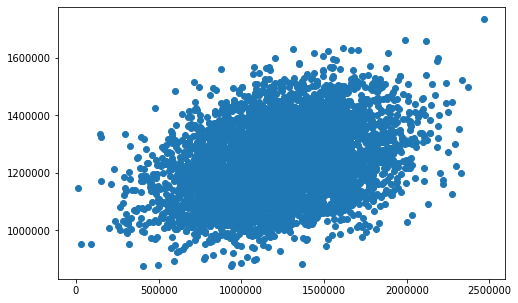

In [37]:
fig = plt.figure(figsize=(8,5))
plt.scatter(y, y_predicted_1)
plt.show()

## Build a model using multiple features

### define X_multi

In [26]:
#X_multi =data.drop(['Price'],axis =1)
X_multi =data.drop(columns = 'Price')
X_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273544
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


### set up 2nd linear model

In [27]:
LR_multi = LinearRegression()
LR_multi.fit(X_multi, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### make predictions

In [29]:
y_predicted_multi = LR_multi.predict(X_multi)
y_predicted_multi

array([[1223968.89166086],
       [1497306.3318863 ],
       [1250884.31019438],
       ...,
       [1020693.92390375],
       [1260503.36914586],
       [1302737.7915763 ]])

### evaluate the model

In [30]:
MSE_multi = mean_squared_error(y, y_predicted_multi)
R2_multi = r2_score(y, y_predicted_multi)
MSE_multi, R2_multi

(10219846512.177862, 0.9180229195220739)

In [33]:
MSE_1, R2_1

(108771672553.6264, 0.1275031240418234)

So, using multiple features to buld a model worked better than using just on feature.

### visualize the predictions

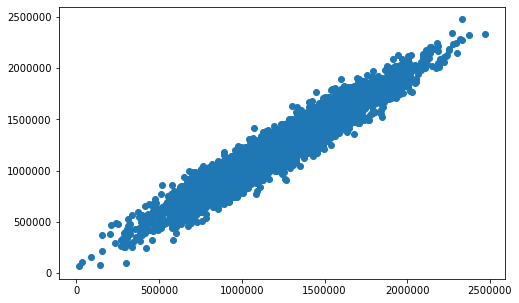

In [14]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.show()

**The more the dots are converging to the diagonal line, the better the model works**

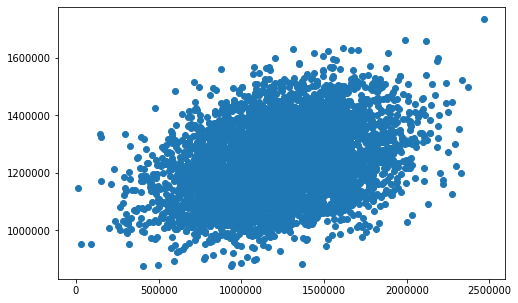

In [39]:
# compare with the first model
fig8 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predicted_1)
plt.show()

## Test model on new data

Make sure the X, y are 2D arrays

In [51]:
X_test = [[65000,5,5,30000,200]]

In [55]:
y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[[817052.19516298]]


## Conclusion